In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from datetime import datetime

print("✅ All basic packages loaded successfully!")


✅ All basic packages loaded successfully!


In [2]:
import pandas as pd

# Load the BANKNIFTY options data
file_path = "OPTIDX_BANKNIFTY_CE_01-Jul-2025_TO_01-Aug-2025.csv"

# Read CSV
df = pd.read_csv(file_path)

# Show first few rows
print("🔹 Preview of data:")
display(df.head())

# Check column names and types
print("\n🔹 Column info:")
print(df.info())

# Check for nulls
print("\n🔹 Missing values per column:")
print(df.isnull().sum())


🔹 Preview of data:


,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover * in ₹ Lakhs,Premium Turnover ** in ₹ Lakhs,Open Int,Change in OI,Underlying Value
0,BANKNIFTY,01-Jul-2025,31-Jul-2025,CE,60100.0,138.00,147.00,112.10,143.40,147.00,143.40,3903.00,82282.14,182.53,33845.00,595.00,57459.45
1,BANKNIFTY,01-Jul-2025,31-Jul-2025,CE,55800.0,1945.90,2145.70,1945.90,2145.70,2145.70,2447.10,6.00,121.40,4.22,6405.00,-35.00,57459.45
2,BANKNIFTY,01-Jul-2025,31-Jul-2025,CE,48500.0,-,-,-,8511.05,8511.05,9199.10,-,-,-,1120.00,-,57459.45
3,BANKNIFTY,01-Jul-2025,31-Jul-2025,CE,62300.0,-,-,-,532.95,-,129.85,-,-,-,-,-,57459.45
4,BANKNIFTY,01-Jul-2025,31-Jul-2025,CE,61000.0,69.85,73.50,56.65,68.05,64.55,68.05,21531.00,460174.92,488.07,601545.00,16065.00,57459.45



🔹 Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10562 entries, 0 to 10561
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Symbol                            10562 non-null  object 
 1   Date                              10562 non-null  object 
 2   Expiry                            10562 non-null  object 
 3   Option type                       10562 non-null  object 
 4   Strike Price                      10562 non-null  float64
 5   Open                              10562 non-null  object 
 6   High                              10562 non-null  object 
 7   Low                               10562 non-null  object 
 8   Close                             10562 non-null  float64
 9   LTP                               10562 non-null  object 
 10  Settle Price                      10562 non-null  object 
 11  No. of contracts                  10562 non-null  o

In [5]:
# Strip extra spaces from column names
df.columns = df.columns.str.strip()

# Make a working copy
df_clean = df.copy()

# Rename and convert date fields
df_clean.rename(columns={
    'Date': 'date',
    'Expiry': 'expiry',
    'Option type': 'option_type',
    'Strike Price': 'strike',
    'Close': 'option_price',
    'Underlying Value': 'spot_price'
}, inplace=True)

# Convert to datetime
df_clean['date'] = pd.to_datetime(df_clean['date'], errors='coerce')
df_clean['expiry'] = pd.to_datetime(df_clean['expiry'], errors='coerce')

# Drop any rows with missing key fields
df_clean.dropna(subset=['date', 'expiry', 'strike', 'option_price', 'spot_price'], inplace=True)

# Final preview
print("✅ Cleaned data preview:")
display(df_clean.head())

print("\n🔹 Column types:")
print(df_clean.dtypes)


✅ Cleaned data preview:


,Symbol,date,expiry,option_type,strike,Open,High,Low,option_price,LTP,Settle Price,No. of contracts,Turnover * in ₹ Lakhs,Premium Turnover ** in ₹ Lakhs,Open Int,Change in OI,spot_price
0,BANKNIFTY,2025-07-01,2025-07-31,CE,60100.0,138.00,147.00,112.10,143.40,147.00,143.40,3903.00,82282.14,182.53,33845.00,595.00,57459.45
1,BANKNIFTY,2025-07-01,2025-07-31,CE,55800.0,1945.90,2145.70,1945.90,2145.70,2145.70,2447.10,6.00,121.40,4.22,6405.00,-35.00,57459.45
2,BANKNIFTY,2025-07-01,2025-07-31,CE,48500.0,-,-,-,8511.05,8511.05,9199.10,-,-,-,1120.00,-,57459.45
3,BANKNIFTY,2025-07-01,2025-07-31,CE,62300.0,-,-,-,532.95,-,129.85,-,-,-,-,-,57459.45
4,BANKNIFTY,2025-07-01,2025-07-31,CE,61000.0,69.85,73.50,56.65,68.05,64.55,68.05,21531.00,460174.92,488.07,601545.00,16065.00,57459.45



🔹 Column types:
Symbol                                      object
date                                datetime64[ns]
expiry                              datetime64[ns]
option_type                                 object
strike                                     float64
Open                                        object
High                                        object
Low                                         object
option_price                               float64
LTP                                         object
Settle Price                                object
No. of contracts                            object
Turnover * in  ₹ Lakhs                      object
Premium Turnover ** in   ₹ Lakhs            object
Open Int                                    object
Change in OI                                object
spot_price                                 float64
dtype: object


In [4]:
print("📋 Column names in your CSV:")
print(df.columns.tolist())


📋 Column names in your CSV:
['Symbol  ', 'Date  ', 'Expiry  ', 'Option type  ', 'Strike Price  ', 'Open  ', 'High  ', 'Low  ', 'Close  ', 'LTP  ', 'Settle Price  ', 'No. of contracts  ', 'Turnover * in  ₹ Lakhs', 'Premium Turnover ** in   ₹ Lakhs', 'Open Int  ', 'Change in OI  ', 'Underlying Value  ']


In [6]:
# Step 3.1: Time to expiry (T in years)
df_clean['T'] = (df_clean['expiry'] - df_clean['date']).dt.days / 365

# Step 3.2: Risk-free rate (assumed constant for now)
risk_free_rate = 0.0675  # 6.75%
df_clean['r'] = risk_free_rate

# Step 3.3: Estimate historical volatility from spot price returns
# First, sort by date
df_vol = df_clean[['date', 'spot_price']].drop_duplicates().sort_values('date')

# Calculate daily returns
df_vol['returns'] = df_vol['spot_price'].pct_change()

# Annualize the standard deviation of returns to get volatility
historical_vol = df_vol['returns'].std() * (252 ** 0.5)
print(f"Estimated historical volatility (σ): {historical_vol:.4f}")

# Assign to all rows
df_clean['sigma'] = historical_vol

# Final preview
df_clean = df_clean[df_clean['T'] > 0]  # remove already expired options if any
print("\n✅ Final preview with T, r, σ:")
display(df_clean[['date', 'expiry', 'strike', 'spot_price', 'option_price', 'T', 'r', 'sigma']].head())


Estimated historical volatility (σ): 0.0895

✅ Final preview with T, r, σ:


,date,expiry,strike,spot_price,option_price,T,r,sigma
0,2025-07-01,2025-07-31,60100.0,57459.45,143.40,0.082192,0.0675,0.089515
1,2025-07-01,2025-07-31,55800.0,57459.45,2145.70,0.082192,0.0675,0.089515
2,2025-07-01,2025-07-31,48500.0,57459.45,8511.05,0.082192,0.0675,0.089515
3,2025-07-01,2025-07-31,62300.0,57459.45,532.95,0.082192,0.0675,0.089515
4,2025-07-01,2025-07-31,61000.0,57459.45,68.05,0.082192,0.0675,0.089515


In [7]:
from scipy.stats import norm
import numpy as np

# Black-Scholes formula for European call option
def black_scholes_call_price(S, K, T, r, sigma):
    if T <= 0 or sigma <= 0:
        return 0.0
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Apply BSM to each row
df_clean['bsm_price'] = df_clean.apply(
    lambda row: black_scholes_call_price(
        row['spot_price'], row['strike'], row['T'], row['r'], row['sigma']
    ), axis=1
)

# Compare with market price
df_clean['abs_error'] = np.abs(df_clean['option_price'] - df_clean['bsm_price'])

# Preview results
print("✅ BSM prices calculated:")
display(df_clean[['date', 'expiry', 'strike', 'spot_price', 'option_price', 'bsm_price', 'abs_error']].head())


✅ BSM prices calculated:


,date,expiry,strike,spot_price,option_price,bsm_price,abs_error
0,2025-07-01,2025-07-31,60100.0,57459.45,143.40,40.711423,102.688577
1,2025-07-01,2025-07-31,55800.0,57459.45,2145.70,2026.396356,119.303644
2,2025-07-01,2025-07-31,48500.0,57459.45,8511.05,9227.780313,716.730313
3,2025-07-01,2025-07-31,62300.0,57459.45,532.95,0.733492,532.216508
4,2025-07-01,2025-07-31,61000.0,57459.45,68.05,9.432750,58.617250


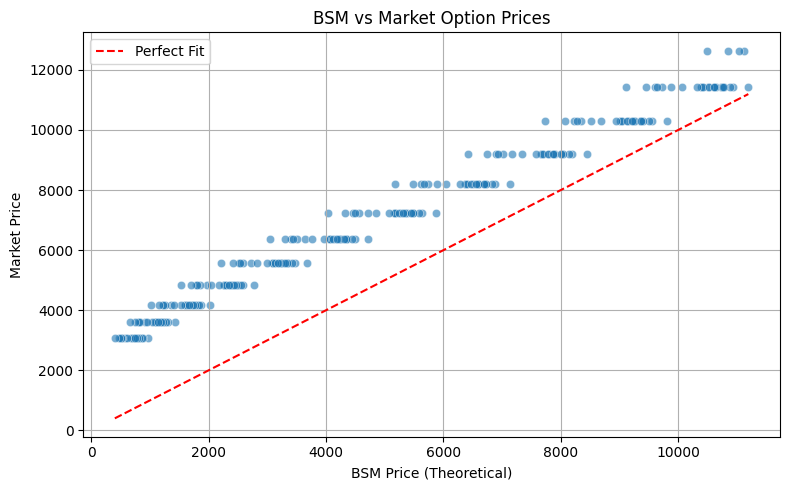

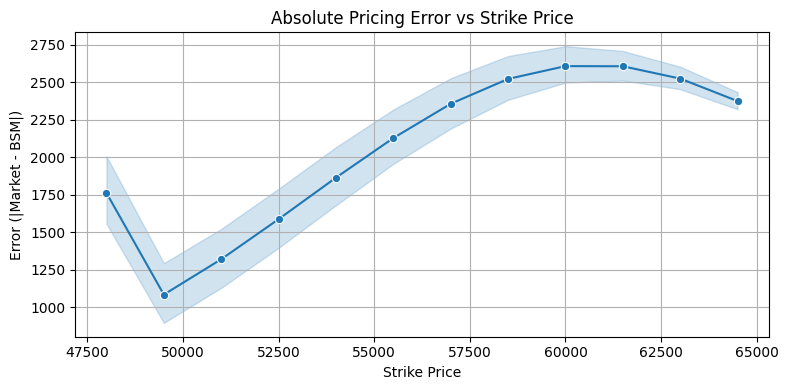

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter a single expiry for cleaner plots (optional)
latest_expiry = df_clean['expiry'].max()
df_plot = df_clean[df_clean['expiry'] == latest_expiry]

# 1. Actual vs. BSM Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_plot, x='bsm_price', y='option_price', alpha=0.6)
plt.plot([df_plot['bsm_price'].min(), df_plot['bsm_price'].max()],
         [df_plot['bsm_price'].min(), df_plot['bsm_price'].max()],
         color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('BSM Price (Theoretical)')
plt.ylabel('Market Price')
plt.title('BSM vs Market Option Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Absolute Error vs Strike
plt.figure(figsize=(8, 4))
sns.lineplot(data=df_plot.sort_values('strike'), x='strike', y='abs_error', marker='o')
plt.title('Absolute Pricing Error vs Strike Price')
plt.xlabel('Strike Price')
plt.ylabel('Error (|Market - BSM|)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
def binomial_tree_call_price(S, K, T, r, sigma, steps=100):
    if T <= 0 or sigma <= 0:
        return 0.0

    dt = T / steps
    u = np.exp(sigma * np.sqrt(dt))  # up factor
    d = 1 / u                        # down factor
    p = (np.exp(r * dt) - d) / (u - d)  # risk-neutral probability
    discount = np.exp(-r * dt)

    # Create asset price tree
    asset_prices = np.zeros((steps + 1, steps + 1))
    for i in range(steps + 1):
        for j in range(i + 1):
            asset_prices[j, i] = S * (u ** (i - j)) * (d ** j)

    # Create option value tree
    option_values = np.zeros_like(asset_prices)
    for j in range(steps + 1):
        option_values[j, steps] = max(0, asset_prices[j, steps] - K)

    # Backward induction
    for i in range(steps - 1, -1, -1):
        for j in range(i + 1):
            option_values[j, i] = discount * (p * option_values[j, i + 1] + (1 - p) * option_values[j + 1, i + 1])

    return option_values[0, 0]


In [10]:
# Apply to DataFrame (this may take a few seconds)
df_clean['binomial_price'] = df_clean.apply(
    lambda row: binomial_tree_call_price(
        row['spot_price'], row['strike'], row['T'], row['r'], row['sigma'], steps=100
    ), axis=1
)

# Compute error vs market
df_clean['binomial_error'] = np.abs(df_clean['option_price'] - df_clean['binomial_price'])

# Preview
display(df_clean[['date', 'strike', 'option_price', 'bsm_price', 'binomial_price', 'binomial_error']].head())


,date,strike,option_price,bsm_price,binomial_price,binomial_error
0,2025-07-01,60100.0,143.40,40.711423,40.359100,103.040900
1,2025-07-01,55800.0,2145.70,2026.396356,2026.623182,119.076818
2,2025-07-01,48500.0,8511.05,9227.780313,9227.780313,716.730313
3,2025-07-01,62300.0,532.95,0.733492,0.668482,532.281518
4,2025-07-01,61000.0,68.05,9.432750,9.221442,58.828558


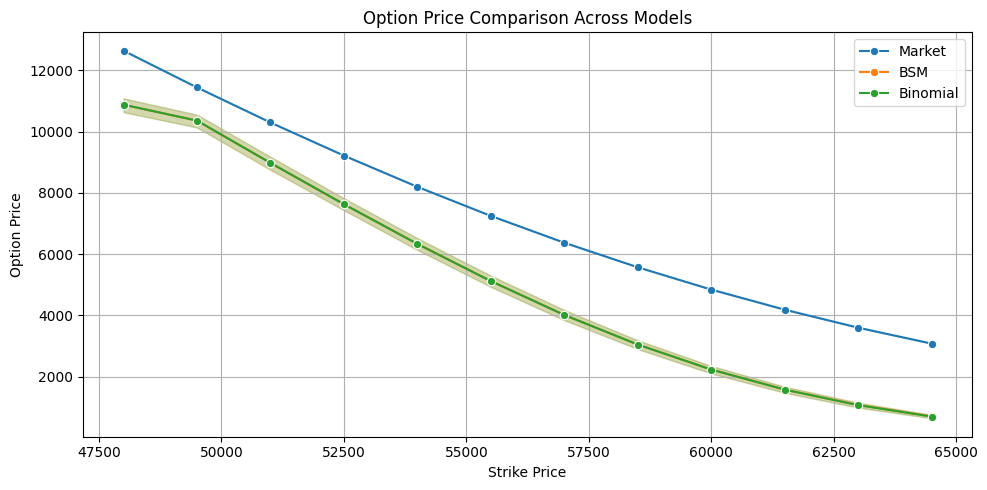

In [11]:
# Compare BSM vs Binomial vs Market
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_clean[df_clean['expiry'] == latest_expiry], x='strike', y='option_price', label='Market', marker='o')
sns.lineplot(data=df_clean[df_clean['expiry'] == latest_expiry], x='strike', y='bsm_price', label='BSM', marker='o')
sns.lineplot(data=df_clean[df_clean['expiry'] == latest_expiry], x='strike', y='binomial_price', label='Binomial', marker='o')
plt.title("Option Price Comparison Across Models")
plt.xlabel("Strike Price")
plt.ylabel("Option Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
# Black-Scholes Greeks for European Call Options
def compute_greeks(S, K, T, r, sigma):
    if T <= 0 or sigma <= 0:
        return 0, 0, 0, 0, 0

    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    delta = norm.cdf(d1)
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T) / 100  # per 1% change in vol
    theta = (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) 
             - r * K * np.exp(-r * T) * norm.cdf(d2)) / 365
    rho = K * T * np.exp(-r * T) * norm.cdf(d2) / 100  # per 1% change in rate

    return delta, gamma, vega, theta, rho


In [13]:
# Apply to each row
df_clean[['delta', 'gamma', 'vega', 'theta', 'rho']] = df_clean.apply(
    lambda row: pd.Series(compute_greeks(
        row['spot_price'], row['strike'], row['T'], row['r'], row['sigma']
    )), axis=1
)

# Preview with Greeks
display(df_clean[['date', 'strike', 'spot_price', 'option_price', 'delta', 'gamma', 'vega', 'theta', 'rho']].head())


,date,strike,spot_price,option_price,delta,gamma,vega,theta,rho
0,2025-07-01,60100.0,57459.45,143.40,0.064035,8.499227e-05,2.064553e+01,-3.753042,2.990695
1,2025-07-01,55800.0,57459.45,2145.70,0.914805,1.057085e-04,2.567772e+01,-13.176925,41.537903
2,2025-07-01,48500.0,57459.45,8511.05,1.000000,1.947140e-14,4.729811e-09,-8.919555,39.642468
3,2025-07-01,62300.0,57459.45,532.95,0.001735,3.778970e-06,9.179521e-01,-0.155254,0.081348
4,2025-07-01,61000.0,57459.45,68.05,0.017822,2.976773e-05,7.230897e+00,-1.266425,0.833940


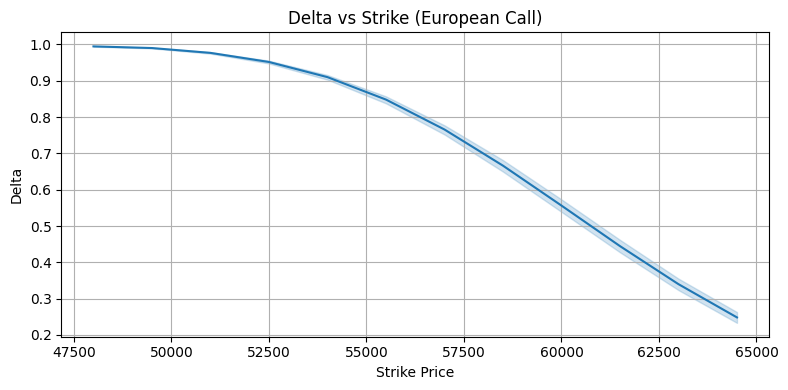

In [14]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=df_clean[df_clean['expiry'] == latest_expiry], x='strike', y='delta')
plt.title("Delta vs Strike (European Call)")
plt.xlabel("Strike Price")
plt.ylabel("Delta")
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
# Save selected columns to CSV
columns_to_export = [
    'date', 'expiry', 'strike', 'spot_price', 'option_price',
    'bsm_price', 'binomial_price', 'abs_error', 'binomial_error',
    'delta', 'gamma', 'vega', 'theta', 'rho'
]

df_clean[columns_to_export].to_csv('banknifty_options_pricing_results.csv', index=False)
print("✅ File saved: banknifty_options_pricing_results.csv")


✅ File saved: banknifty_options_pricing_results.csv
